<a href="https://colab.research.google.com/github/irajamuller/quantum_computing/blob/main/Algoritmo_de_Deutsch_e_Porta_AND_OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex

import qiskit.quantum_info as qi
import numpy as np
import random as rd


In [ ]:
qc_t = transpile(qc)
backend = AerSimulator()

result = backend.run(qc_t, shots=1000).result()
counts = result.get_counts()

In [ ]:
for k in sorted(counts, key=lambda x: int(x, 2)):
  print(f'A = {k[2]}, B = {k[1]}, OUTPUT = {k[0]}')

A = 0, B = 0, OUTPUT = 0
A = 1, B = 0, OUTPUT = 1
A = 0, B = 1, OUTPUT = 1
A = 1, B = 1, OUTPUT = 1


In [ ]:
def deutsch_oracle(case):
  qc = QuantumCircuit(2)
  choice = rd.randint(0, 1)

  if case == 'constant':
    if choice == 0:
      qc.id(1) # ID / não faz nada
    else:
      qc.x(1) # NOT
  else:
    if choice == 0:
      qc.cx(0, 1) # CNOT
    else:
      qc.cx(0, 1) # CNOT
      qc.x(1) # NOT

  return qc

In [ ]:
def deutsch_circuit(choice):
  oracle = deutsch_oracle(choice)

  qc = QuantumCircuit(2, 1)
  qc.initialize([0, 1], 1)
  qc.barrier()
  qc.h([0, 1])
  qc.barrier()
  qc.compose(oracle, inplace=True)
  qc.barrier()
  qc.h(0)
  qc.measure(0, 0)

  return qc

In [ ]:
list = ['constant', 'balanced']
choice = rd.choice(list)
qc = deutsch_circuit(choice)

qc_t = transpile(qc)
backend = AerSimulator()

result = backend.run(qc_t, shots=1).result()
print(result.get_counts(), choice)

{'0': 1} constant


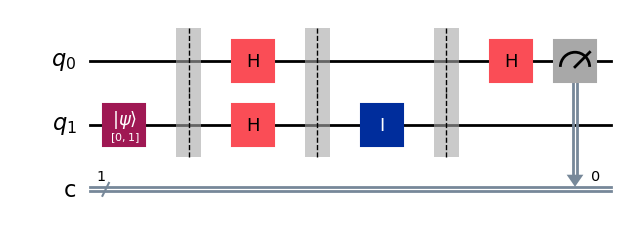

In [ ]:
qc.draw('mpl')

In [ ]:
# Tabela-verdade OR
qc = QuantumCircuit(3, 3)
qc.h([0, 1])
qc.ccx(0, 1, 2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

In [ ]:
# Tabela-verdade AND
qc = QuantumCircuit(3, 3)
qc.h([0, 1])
qc.ccx(0, 1, 2)
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')